In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from google.colab import files

In [2]:
train_df = pd.read_csv('/content/drive/MyDrive/College/Semester 5/NLP Project/NLP_Project-main/NLP_Project-main/Data/PreprocessedData/train_preprocessed.csv')

In [3]:
train_df

,Unnamed: 0,tweet,label,id,preprocessed_text
0,11460,@USER She is not leaving BB,NOT,11460,<user> leaving bb
1,7945,@USER @USER Ford and the conservatives hates t...,NOT,7945,<user> <user> ford conservatives hates display...
2,9185,@USER God is good to us 🙏👍,NOT,9185,<user> god good us <emoji> <emoji>
3,1056,@USER woman accusing Supreme Court nominee #Ka...,NOT,1056,<user> woman accusing supreme court nominee ka...
4,1146,@USER CORRECTION: The Liberals won a false-maj...,NOT,1146,<user> correction liberals falsemajority backs...
...,...,...,...,...,...
10587,11964,@USER Isn't there a Statute of Limitations on ...,NOT,11964,<user> isnt statute limitations sexual assault...
10588,5191,@USER @USER He is probably dying due to dog fu...,NOT,5191,<user> <user> probably dying due dog fumes <em...
10589,5390,@USER @USER You are so right!,NOT,5390,<user> <user> right
10590,860,@USER Sam’s act is working. I swear she is act...,NOT,860,<user> sam ’ act working swear acting


In [4]:
raw_texts = (train_df['tweet'].to_list())
texts = (train_df['preprocessed_text'].to_list())

In [5]:
label = train_df['label'].to_list()

hate_text = []
good_text = []

for i in range(len(texts)) :
  if label[i] == 'OFF' :
    hate_text.append(texts[i])
  else:
    good_text.append(texts[i])

In [7]:
!pip install textstat
import textstat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 105 kB 9.0 MB/s 
     |████████████████████████████████| 2.0 MB 46.1 MB/s 


In [11]:
def plot_reading_ease_hist(text, title) :
  
  ease = np.array([textstat.flesch_reading_ease((x)) for x in text])
  ease[ease < 0] = 0 
  
  fig, ax = plt.subplots(figsize =(8, 6))
  N, bins, patches = ax.hist(ease, bins = np.linspace(0,125,20))
  
  plt.xlabel("Reading Ease Score")
  plt.ylabel("Count of text")
  plt.title(title)

  # Setting color
  fracs = ((N**(1 / 5)) / N.max())
  norm = colors.Normalize(fracs.min(), fracs.max())
  
  for thisfrac, thispatch in zip(fracs, patches):
      color = plt.cm.viridis(norm(thisfrac))
      thispatch.set_facecolor(color)

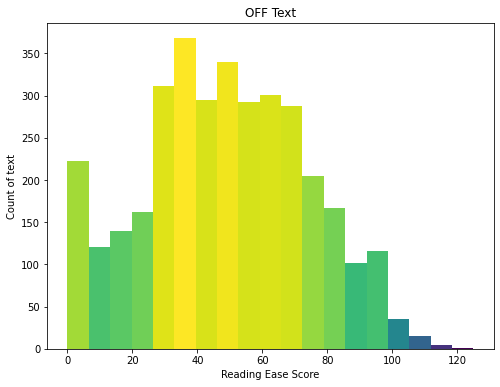

In [12]:
plot_reading_ease_hist(hate_text, 'OFF Text')

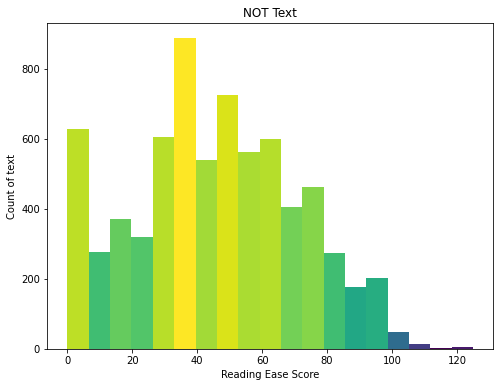

In [13]:
plot_reading_ease_hist(good_text, 'NOT Text')

In [14]:
def plot_readability_class_index(text, title) :
  
  classidx = np.array([textstat.automated_readability_index((x)) for x in text])
  classidx[classidx < 0] = 0 
  
  fig, ax = plt.subplots(figsize =(8, 6))
  N, bins, patches = ax.hist(classidx, bins = np.linspace(0,22,8))
  
  plt.xlabel("Readability Class Index")
  plt.ylabel("Count of text")
  plt.title(title)

  # Setting color
  fracs = ((N**(1 / 5)) / N.max())
  norm = colors.Normalize(fracs.min(), fracs.max())
  
  for thisfrac, thispatch in zip(fracs, patches):
      color = plt.cm.viridis(norm(thisfrac))
      thispatch.set_facecolor(color)


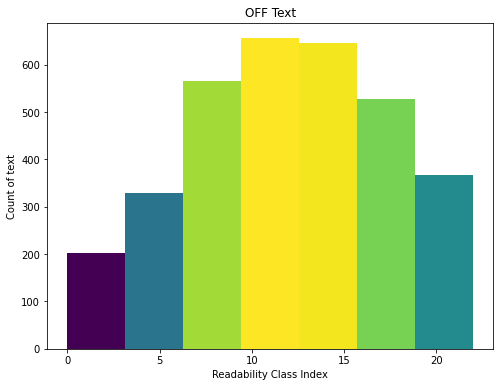

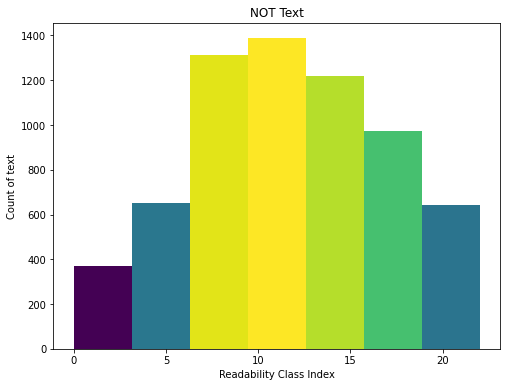

In [15]:
plot_readability_class_index(hate_text, 'OFF Text')
plot_readability_class_index(good_text, 'NOT Text')

In [16]:
def plot_reading_time(text, title) :
  
  time = np.array([textstat.reading_time((x), ms_per_char=14.69) for x in text])
  time[time < 0] = 0 
  
  fig, ax = plt.subplots(figsize =(7, 5))
  N, bins, patches = ax.hist(time, bins = np.linspace(0,6,8))
  
  plt.xlabel("Reading Time")
  plt.ylabel("Count of text")
  plt.title(title)

  # Setting color
  fracs = ((N**(1 / 5)) / N.max())
  norm = colors.Normalize(fracs.min(), fracs.max())
  
  for thisfrac, thispatch in zip(fracs, patches):
      color = plt.cm.viridis(norm(thisfrac))
      thispatch.set_facecolor(color)

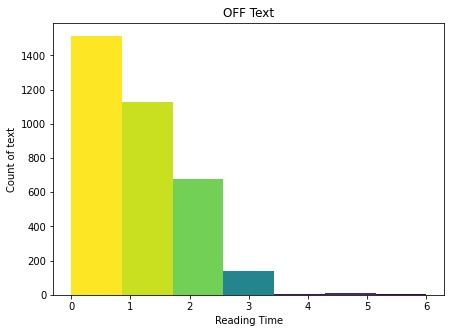

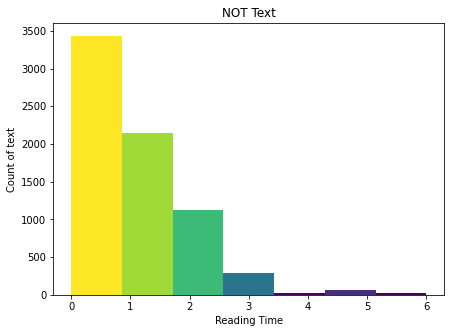

In [17]:
plot_reading_time(hate_text, 'OFF Text')
plot_reading_time(good_text, 'NOT Text')

The preprocessed are more difficult to understand for humans as comapred to raw texts. 

Majority of the texts are very small word sequences resulting in smaller reading time.

In [18]:
def plot_letter_count(text, title) :
  
  lexc = np.array([textstat.lexicon_count((x)) for x in text])
  lexc[lexc < 0] = 0 
  
  fig, ax = plt.subplots(figsize =(7, 5))
  N, bins, patches = ax.hist(lexc, bins = np.linspace(0,50,8))
  
  plt.xlabel("Lexicon count")
  plt.ylabel("Count of text")
  plt.title(title)

  # Setting color
  fracs = ((N**(1 / 5)) / N.max())
  norm = colors.Normalize(fracs.min(), fracs.max())
  
  for thisfrac, thispatch in zip(fracs, patches):
      color = plt.cm.viridis(norm(thisfrac))
      thispatch.set_facecolor(color)

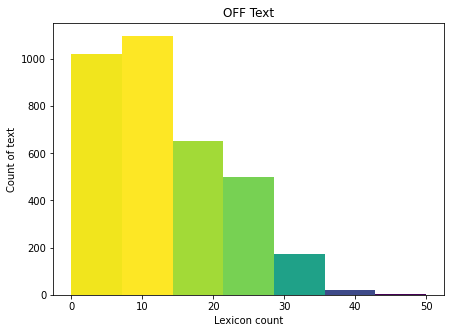

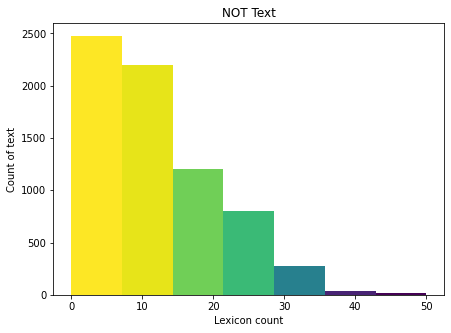

In [19]:
plot_letter_count(hate_text, 'OFF Text')
plot_letter_count(good_text, 'NOT Text')

In [20]:
def plot_monosyllable_word_count(text, title) :
  
  lexc = np.array([textstat.monosyllabcount((x)) for x in text])
  lexc[lexc < 0] = 0 
  
  fig, ax = plt.subplots(figsize =(7, 5))
  N, bins, patches = ax.hist(lexc, bins = np.linspace(0,8,9))
  
  plt.xlabel("Monosyllable word count")
  plt.ylabel("Count of text")
  plt.title(title)

  # Setting color
  fracs = ((N**(1 / 5)) / N.max())
  norm = colors.Normalize(fracs.min(), fracs.max())
  
  for thisfrac, thispatch in zip(fracs, patches):
      color = plt.cm.viridis(norm(thisfrac))
      thispatch.set_facecolor(color)

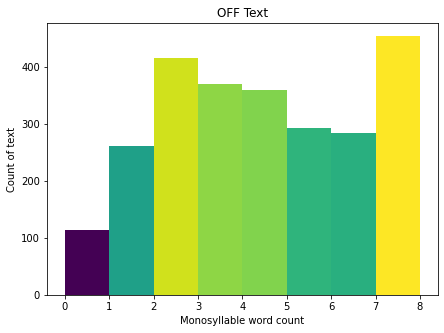

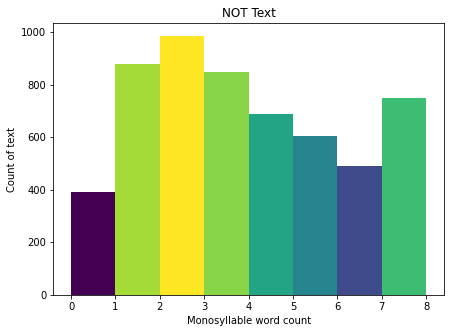

In [21]:
plot_monosyllable_word_count(hate_text, 'OFF Text')
plot_monosyllable_word_count(good_text, 'NOT Text')

In [22]:
def plot_text_length(text, title) :
  
  lexc = np.array([textstat.char_count((x), ignore_spaces=True) for x in text])
  lexc[lexc < 0] = 0 
  
  fig, ax = plt.subplots(figsize =(7, 5))
  N, bins, patches = ax.hist(lexc, bins = np.linspace(0,300,9))
  
  plt.xlabel("Text Length")
  plt.ylabel("Count of text")
  plt.title(title)

  # Setting color
  fracs = ((N**(1 / 5)) / N.max())
  norm = colors.Normalize(fracs.min(), fracs.max())
  
  for thisfrac, thispatch in zip(fracs, patches):
      color = plt.cm.viridis(norm(thisfrac))
      thispatch.set_facecolor(color)

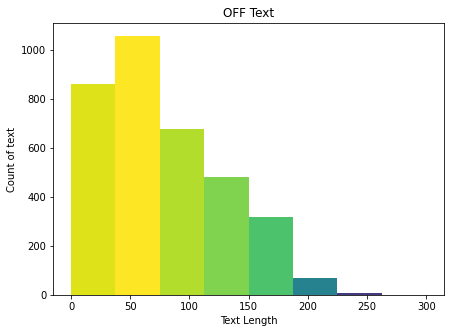

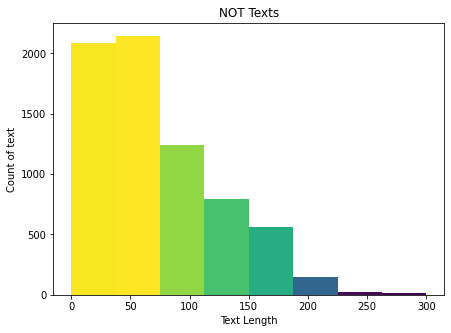

In [23]:
plot_text_length(hate_text, 'OFF Text')
plot_text_length(good_text, 'NOT Texts')

#### CLASSWISE PLOTS

NOT    67.09781
OFF    32.90219
Name: label, dtype: float64



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

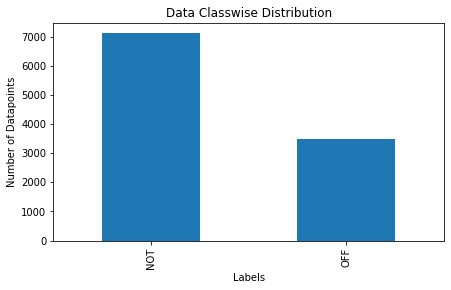

In [24]:
train_df['label'].value_counts().plot(kind='bar', figsize = (7,4))
print((train_df['label'].value_counts()/train_df['label'].count())*100)
plt.title('Data Classwise Distribution')
plt.xlabel('Labels')
plt.ylabel('Number of Datapoints')
print()
plt.savefig("class.png")
files.download("class.png") 
plt.show()

Unbalanced Dataset

In [26]:
def plot_text_length(text1, text2, title = '') :
  
  # plt.style.use('seaborn-deep')

  lexc1 = np.array([textstat.char_count((x), ignore_spaces=True) for x in text1])
  lexc2 = np.array([textstat.char_count((x), ignore_spaces=True) for x in text2])
  lexc1[lexc1 < 0] = 0
  lexc2[lexc2 < 0] = 0 
  
  N1, bins1, patches1 = plt.hist([lexc1,lexc2], bins = np.linspace(0,300,150), alpha = 0.5, label = ['OFF','NOT'], color = ['r','b'])
  # N2, bins2, patches2 = plt.hist(lexc2, bins = np.linspace(0,300,150), alpha=0.5, label = 'NOT' )
  
  plt.xlabel("Text Length")
  plt.ylabel("Count of text")
  plt.legend(loc = 'upper right')
  plt.title(title)

  plt.show()

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


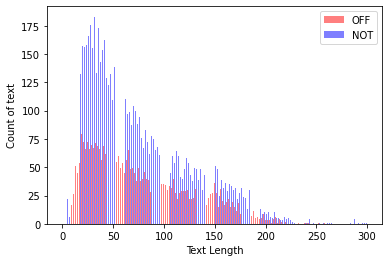

In [27]:
plot_text_length(hate_text, good_text)

In [10]:
h = [ x.replace('user', '') for x in hate_text]
g = [ x.replace('user', '') for x in good_text]

h = [ x.replace('emoji', '') for x in h]
g = [ x.replace('emoji', '') for x in g]

h = [ x.replace('url', '') for x in h]
g = [ x.replace('url', '') for x in g]

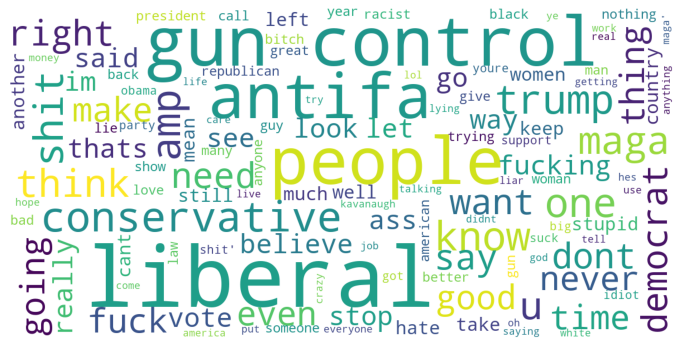

In [29]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
  wordcloud = WordCloud(
      background_color='white',
      stopwords=stopwords,
      max_words=120,
      max_font_size=50,
      scale=3
  )

  wordcloud=wordcloud.generate(str(data))

  fig = plt.figure(1, figsize=(12, 12))
  plt.axis('off')

  plt.imshow(wordcloud)
  plt.show()

show_wordcloud(h)

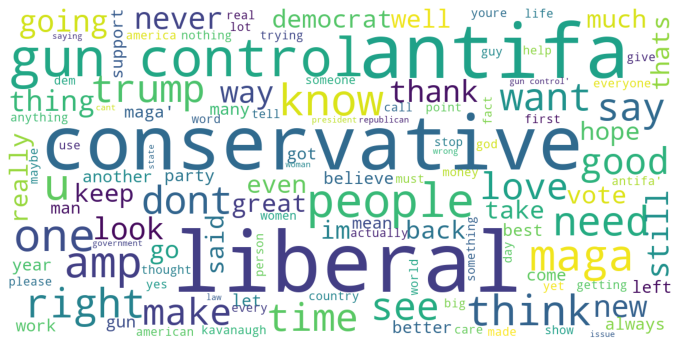

In [30]:
show_wordcloud(g)

In [32]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

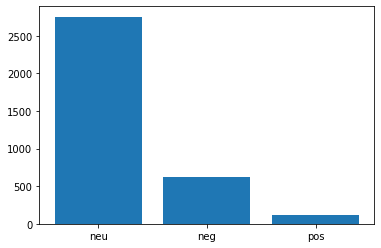

In [33]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

def get_vader_score(sent):
    # Polarity score returns dictionary
    ss = sid.polarity_scores(sent)
    #return ss
    return np.argmax(list(ss.values())[:-1])

train_df['polarity'] = train_df['preprocessed_text'].map(lambda x: get_vader_score(x))

hate_polarity = train_df[train_df['label']=='OFF']['polarity'].replace({0:'neg',1:'neu',2:'pos'})
good_polarity = train_df[train_df['label']=='NOT']['polarity'].replace({0:'neg',1:'neu',2:'pos'})

# print(hate_polarity)
plt.bar(hate_polarity.value_counts().index, hate_polarity.value_counts())
plt.show()

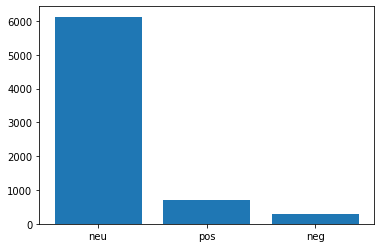

In [34]:
plt.bar(good_polarity.value_counts().index, good_polarity.value_counts())
plt.show()

In [35]:
# Embedding -> sentence embedding,  
# Topic modelling
# Classwise - word, charcter

In [37]:
embed = np.load("/content/drive/MyDrive/NLP_Project/PreComputedWordEmbedding/sentence_embeddings_train.npy", allow_pickle=True)

In [38]:
label = np.load("/content/drive/MyDrive/NLP_Project/PreComputedWordEmbedding/train_labels.npy", allow_pickle = True)

In [39]:
embed.shape

(10592, 768)

In [40]:
label.shape

(10592,)

In [41]:
import numpy as np
from sklearn.manifold import TSNE

X = list(embed)
X_embedded = TSNE(n_components=2).fit_transform(X)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [42]:
df_embeddings = pd.DataFrame(X_embedded)
df_embeddings = df_embeddings.rename(columns={0:'x',1:'y'})
df_embeddings = df_embeddings.assign(label=label)

In [54]:
!pip install -U kaleido
import kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [63]:
import plotly.express as px

fig = px.scatter(
    df_embeddings, x='x', y='y',
    color='label', labels={'color': 'label'} , title = 'Offensive Language Identification', template = 'simple_white', width = 850, height = 500)

fig.show()
# fig.write_image("tsne.png")
# files.download('tsne.png')

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_embededded = pca.fit_transform(embed)

df_embeddings = pd.DataFrame(X_embedded)
df_embeddings = df_embeddings.rename(columns={0:'x',1:'y'})
df_embeddings = df_embeddings.assign(label=label)

import plotly.express as px

fig = px.scatter(
    df_embeddings, x='x', y='y',
    color='label', labels={'color': 'label'} , title = 'Offensive Language Identification', template = 'simple_white', width = 850, height = 500)

fig.show()

In [65]:
!pip install sentence_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [66]:
!pip install umap
!pip install hdbscan
!pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached hdbscan-0.8.29.tar.gz (5.2 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp38-cp38-linux_x86_64.whl size=2700835 sha256=554509e8e0cfe05c444e525aa199c70f529450440024f8b446c6f5ed6aa8bc94
  Stored in directory: /root/.cache/pip/wheels/76/06/48/527e038689c581cc9e519c73840efdc7473805149e55bd7ffd
Successfully built hdbscan
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached bertopic-0.12.0-py2.py3-none-any.whl (90 kB)
  Using cached PyYAML-5.4.1-cp38-cp38-manylinux1_x86_64.whl (662 kB)
  Using cached umap-learn-0.5.3.tar.gz (88 kB)
     |████████████████████████████████| 1.1 MB 7.7 MB/s 

In [6]:
from sentence_transformers import SentenceTransformer
from umap import UMAP
from hdbscan import HDBSCAN

embedding_model = SentenceTransformer('all-MiniLM-L6-v2')
umap_model = UMAP(n_neighbors=3, n_components=3, min_dist=0.05)
hdbscan_model = HDBSCAN(min_cluster_size=80, min_samples=40,
                        gen_min_span_tree=True,
                        prediction_data=True)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [8]:
import nltk
nltk.download('stopwords')

from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

stopwords = list(stopwords.words('english')) + ['http', 'https', 'amp', 'com']

# we add this to remove stopwords that can pollute topcs
vectorizer_model = CountVectorizer(ngram_range=(1, 2), stop_words=stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
from bertopic import BERTopic

model = BERTopic(
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    embedding_model=embedding_model,
    vectorizer_model=vectorizer_model,
    top_n_words=5,
    language='english',
    calculate_probabilities=True,
    verbose=True
)

topics, probs = model.fit_transform(h)

Batches:   0%|          | 0/109 [00:00<?, ?it/s]

2022-12-02 23:00:25,569 - BERTopic - Transformed documents to Embeddings
2022-12-02 23:00:46,679 - BERTopic - Reduced dimensionality
2022-12-02 23:00:46,949 - BERTopic - Clustered reduced embeddings


In [12]:
model.visualize_barchart()

In [13]:
freq = model.get_topic_info()
freq.head(10)

,Topic,Count,Name
0,-1,1276,-1_liberals_like_people_conservatives
1,0,598,0_shit_fuck_ass_bitch
2,1,413,1_maga_kavanaugh_trump_liberals
3,2,368,2_gun_control_gun control_people
4,3,297,3_antifa_people_like_white
5,4,223,4_liberals_conservatives_trump_like
6,5,127,5_nigga_sucks_niggas_shit
7,6,96,6_liberals_women_conservatives_woman
8,7,87,7_holder_human beings_beings_eric


In [14]:
from bertopic import BERTopic

model1 = BERTopic(
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    embedding_model=embedding_model,
    vectorizer_model=vectorizer_model,
    top_n_words=5,
    language='english',
    calculate_probabilities=True,
    verbose=True
)

topics, probs = model1.fit_transform(g)

Batches:   0%|          | 0/223 [00:00<?, ?it/s]

2022-12-02 23:02:57,981 - BERTopic - Transformed documents to Embeddings
2022-12-02 23:03:26,069 - BERTopic - Reduced dimensionality
2022-12-02 23:03:26,583 - BERTopic - Clustered reduced embeddings


In [15]:
model1.visualize_barchart()